In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

## Dates & Other Constants

In [2]:
# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "C:/Users/CLeen/Documents/GitHub/Python4Finance/stock_list/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

## Get Stock File Names in a List

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)

2948

## Function that Returns a Dataframe from a CSV

In [4]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

## Merge Multiple Stocks in One Dataframe by Column Name

In [5]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

## Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight. 

$w_1r_1 + w_2r_2 = r_p$

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$(w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_1 + w_2^2\sigma_2^2$

## Plotting an Efficient Frontier

## Stock Portfolio

In [6]:
# Here I added the top 30 for each sector. You can obviously add as many as 
# you like
# Then to keep the portfolio smaller I eliminated stocks that had an 
# allocation less than 1% to get this final list
# I showed in part 4 of this series how to get the top sector stocks
port_list = ["GNRC", "CPRT", "ODFL", 
            "AMD", "PAYC",
            "CHTR",
            "MKC", "PG",
            "PGR",
            "NEM",
            "CCI",
            "COG"]
num_stocks = len(port_list)
num_stocks

12

## Merge all Stock Price Data

In [7]:
mult_df = merge_df_by_column_name('Adj Close',  '2018-01-01', 
                                  '2021-09-01', *port_list)
mult_df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COG
Date,,,,,,,,,,,,
2018-01-02,48.029999,43.599998,88.451561,10.980000,80.440002,348.970001,47.967422,81.579140,47.749058,34.842434,96.650520,26.996706
2018-01-03,49.730000,43.389999,88.543671,11.550000,81.029999,353.029999,48.081146,81.480141,47.723183,34.550255,96.242355,27.118145
2018-01-04,50.070000,43.740002,89.063423,12.120000,83.110001,349.790009,48.384403,82.056091,47.714550,34.933739,95.124413,27.006050
2018-01-05,50.410000,43.529999,89.872673,11.880000,83.879997,350.880005,48.858246,82.110107,47.895683,35.061573,95.851990,26.865927
2018-01-08,49.529999,43.549999,90.767464,12.280000,84.639999,356.549988,48.910378,82.542084,48.042313,35.025055,96.135902,27.006050
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-13,414.100006,141.500000,281.000000,110.550003,463.730011,771.710022,86.680000,143.639999,96.120003,58.840000,194.779999,15.820000
2021-08-16,410.190002,140.789993,281.679993,107.480003,473.440002,782.580017,87.379997,144.639999,97.099998,58.880001,194.960007,15.470000
2021-08-17,389.989990,139.029999,279.799988,107.559998,462.529999,788.369995,87.839996,144.880005,95.669998,58.860001,196.839996,15.500000


## Plot Growth of Investments over Total Dataset

<AxesSubplot:xlabel='Date'>

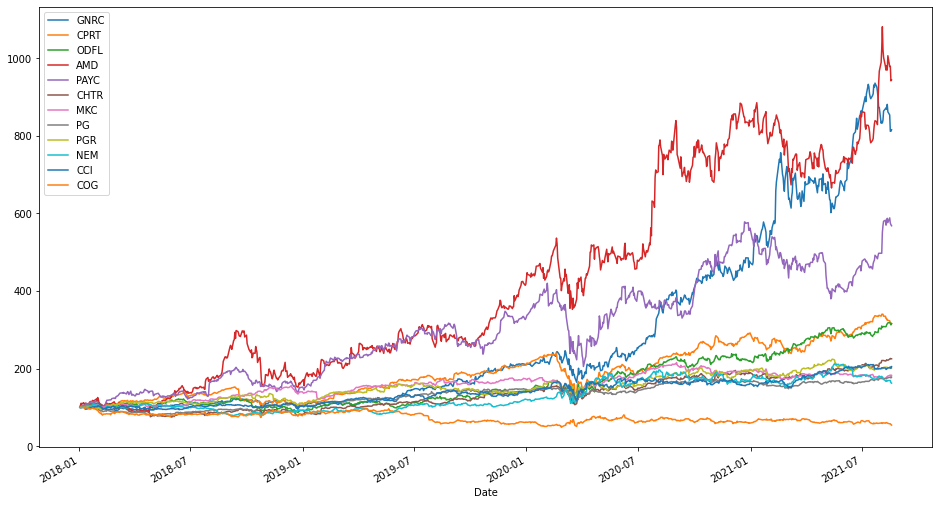

In [8]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))


## Mean Returns

In [9]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

GNRC    0.578732
CPRT    0.316853
ODFL    0.317229
AMD     0.619089
PAYC    0.479006
CHTR    0.223708
MKC     0.165672
PG      0.158559
PGR     0.193127
NEM     0.133378
CCI     0.197605
COG    -0.169667
dtype: float64

## Covarience

In [10]:
returns.cov() * 252

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COG
GNRC,0.159048,0.062768,0.060763,0.086918,0.087261,0.043377,0.034539,0.030413,0.042269,0.025452,0.044937,0.033881
CPRT,0.062768,0.100627,0.051827,0.067935,0.087644,0.038505,0.029582,0.026961,0.032086,0.018029,0.035510,0.028307
ODFL,0.060763,0.051827,0.102037,0.066116,0.063582,0.035474,0.028997,0.024000,0.038616,0.016335,0.031373,0.025576
AMD,0.086918,0.067935,0.066116,0.314569,0.116973,0.057107,0.036475,0.032385,0.044357,0.035233,0.043951,0.032903
PAYC,0.087261,0.087644,0.063582,0.116973,0.229446,0.052728,0.043123,0.034465,0.055861,0.022600,0.059854,0.037831
CHTR,0.043377,0.038505,0.035474,0.057107,0.052728,0.085700,0.023924,0.026525,0.029446,0.015145,0.035715,0.022698
MKC,0.034539,0.029582,0.028997,0.036475,0.043123,0.023924,0.068644,0.034484,0.031562,0.019582,0.039614,0.022812
PG,0.030413,0.026961,0.024000,0.032385,0.034465,0.026525,0.034484,0.050476,0.030747,0.012779,0.035029,0.027736
PGR,0.042269,0.032086,0.038616,0.044357,0.055861,0.029446,0.031562,0.030747,0.074747,0.014813,0.036130,0.028568
NEM,0.025452,0.018029,0.016335,0.035233,0.022600,0.015145,0.019582,0.012779,0.014813,0.107647,0.020727,0.013750


## Correlation

In [11]:
returns.corr()

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COG
GNRC,1.000000,0.496153,0.476978,0.388585,0.456788,0.371545,0.330553,0.339437,0.387673,0.194517,0.404252,0.220078
CPRT,0.496153,1.000000,0.511469,0.381837,0.576799,0.414641,0.355935,0.378305,0.369972,0.173230,0.401618,0.231165
ODFL,0.476978,0.511469,1.000000,0.369035,0.415542,0.379350,0.346475,0.334424,0.442172,0.155862,0.352366,0.207416
AMD,0.388585,0.381837,0.369035,1.000000,0.435400,0.347807,0.248217,0.257010,0.289271,0.191466,0.281144,0.151972
PAYC,0.456788,0.576799,0.415542,0.435400,1.000000,0.376021,0.343610,0.320259,0.426556,0.143803,0.448303,0.204598
CHTR,0.371545,0.414641,0.379350,0.347807,0.376021,1.000000,0.311914,0.403289,0.367915,0.157683,0.437705,0.200858
MKC,0.330553,0.355935,0.346475,0.248217,0.343610,0.311914,1.000000,0.585832,0.440629,0.227798,0.542449,0.225558
PG,0.339437,0.378305,0.334424,0.257010,0.320259,0.403289,0.585832,1.000000,0.500568,0.173356,0.559369,0.319806
PGR,0.387673,0.369972,0.442172,0.289271,0.426556,0.367915,0.440629,0.500568,1.000000,0.165140,0.474122,0.270694
NEM,0.194517,0.173230,0.155862,0.191466,0.143803,0.157683,0.227798,0.173356,0.165140,1.000000,0.226653,0.108567


## Generate Random Weights Equal to 1

In [12]:
# Generate 11 random values that sum to 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.02040087 0.02705713 0.18270498 0.10398342 0.1152484  0.12036027
 0.08600242 0.14460645 0.10764895 0.02517977 0.06201882 0.0047885 ]
Total Weight : 1.0000000000000002


## Calculating Return of Portfolio

In [13]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.29761225010033965

## Calculating Volatility

In [14]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.22500699073013475

## Analyzing Returns & Risks of 10000 Combinations

In [15]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.20044407, 0.20859967, 0.3460962 , ..., 0.24412632, 0.24431032,
        0.30905153]),
 array([0.20891798, 0.1957804 , 0.23909566, ..., 0.20516046, 0.21604862,
        0.22514625]),
 array([0.89960696, 1.00163076, 1.39524159, ..., 1.12900075, 1.0729544 ,
        1.31715062]),
 array([[0.00423918, 0.0515764 , 0.07003111, ..., 0.05395933, 0.04338091,
         0.16228764],
        [0.07542757, 0.10594418, 0.0442045 , ..., 0.10134402, 0.14861638,
         0.1104087 ],
        [0.15484903, 0.01828918, 0.06935335, ..., 0.1407519 , 0.00984544,
         0.00777992],
        ...,
        [0.09658794, 0.14085135, 0.0063378 , ..., 0.15253171, 0.1454067 ,
         0.07236166],
        [0.00425674, 0.08454729, 0.09612153, ..., 0.14388514, 0.14568763,
         0.09005363],
        [0.1183321 , 0.10335594, 0.01846603, ..., 0.08097038, 0.13766942,
         0.01275797]]))

## Plotting the Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

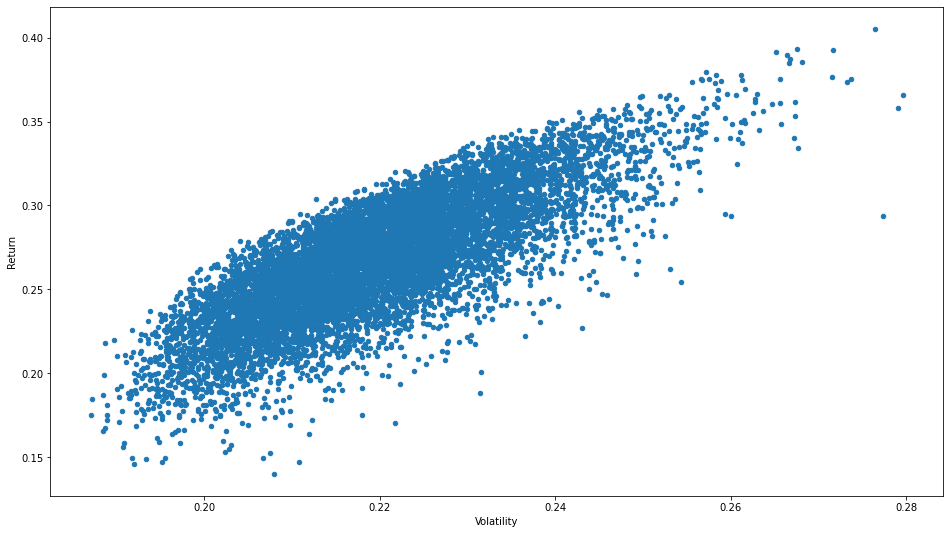

In [16]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

## Sharpe Ratio

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk. 

*Sharpe Ratio* = $\frac{r_i - r_f}{\sigma_i}$

$r_f = $ Risk Free Rate

$r_i = $ Rate of Return of the stock

$\sigma_i = $ Standard Deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [17]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])


Stock : GNRC : 18.43
Stock : CPRT : 16.13
Stock : ODFL : 17.91
Stock : AMD : 18.39
Stock : PAYC : 5.10
Stock : CHTR : 4.72
Stock : MKC : 0.10
Stock : PG : 2.52
Stock : PGR : 9.05
Stock : NEM : 1.42
Stock : CCI : 4.14
Stock : COG : 2.08

Volatility : 0.26513162893517306
Return : 0.3916281220229548


## Get Number of Shares & Cost Based on Weights

In [18]:
# I'm going to use a similar portfolio that has slightly easier percents to work with

# Calculated Weighting
# Stock : GNRC : 21.90 
# Stock : CPRT : 15.63 
# Stock : ODFL : 23.83
# Stock : AMD : 11.09
# Stock : PAYC : 1.86
# Stock : CHTR : 3.55
# Stock : MKC : 2.87
# Stock : PG : 1.09
# Stock : PGR : 2.86
# Stock : NEM : 10.11
# Stock : CCI : 4.34
# Stock : COG : 0.87

Find percentage closest to 1 and use it as the basis for calculating all other shares
Since PG is 1% : GNRC is 21.90 : Multiply cost of PG (118.20) by 22 (21.9 Rounded up) and then divide 
that by the cost of GNRC to get the shares to buy for GNRC

118.20 * 22 = 2,600.4 / 102.01 = 25.49 (25 Shares) * 102.01 = 

In situations in which prices don't work either discard stock or force 1 share

In [19]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

## Get Portfolio Weighting

In [20]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

## Returns the Value of Portfolio by Date

In [21]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_df_start.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

## Approximate Portfolio Weighting Based on Request

In [22]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", 
             "PG", "PGR", "NEM", "CCI", "COG"]

port_wts = [22, 16, 24, 11, 2, 4, 3, 1, 3, 10, 4, 1]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Adj Close',  '2020-01-02', 
                                  '2020-01-02', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()
# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

# Calculated Weighting
# Stock : GNRC : 21.90 
# Stock : CPRT : 15.63 
# Stock : ODFL : 23.83
# Stock : AMD : 11.09
# Stock : PAYC : 1.86
# Stock : CHTR : 3.55
# Stock : MKC : 2.87
# Stock : PG : 1.09
# Stock : PGR : 2.86
# Stock : NEM : 10.11
# Stock : CCI : 4.34
# Stock : COG : 0.87

tot_shares, share_cost = get_port_shares(118.20, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date('2020-12-31', tot_shares, port_list)

Shares : [25, 20, 22, 26, 1, 1, 4, 1, 5, 28, 3, 7]
Share Cost : [2550.250053405762, 1869.6000671386719, 2801.878051757813, 1276.5999603271482, 271.79998779296875, 490.4299926757813, 327.7214050292969, 118.2088623046875, 341.39949798583984, 1168.7718505859377, 405.90911865234364, 115.7245979309082]
Total Investment : 11738.293445587158
Stock Weights : [0.21725901343559373, 0.1592735840013883, 0.23869551947614145, 0.10875515817054884, 0.02315498322246732, 0.04178034864685985, 0.027918999175514648, 0.010070361833484953, 0.029084253138533016, 0.09956914571984232, 0.034579908956436874, 0.00985872422318878]


[102.01000213623048,
 93.4800033569336,
 127.35809326171876,
 49.09999847412109,
 271.79998779296875,
 490.4299926757813,
 81.93035125732422,
 118.2088623046875,
 68.27989959716797,
 41.74185180664063,
 135.30303955078122,
 16.532085418701172]